In [32]:
import numpy as np 
import matplotlib.pyplot as plt 

# is22_0_001 = np.loadtxt("../Data/quantumDot/MC/Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.001_numMCSteps_2097152_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_20_numhidden2_20_activationFunction_sigmoid_.txt")
is22_0_01 = np.loadtxt("../Data/quantumDot/MC/Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.01_numMCSteps_2097152_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_20_numhidden2_20_activationFunction_sigmoid_.txt")
is22_0_1 = np.loadtxt("../Data/quantumDot/MC/Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.1_numMCSteps_2097152_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_20_numhidden2_20_activationFunction_sigmoid_.txt")
is22_1 = np.loadtxt("../Data/quantumDot/MC/Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_1.0_numMCSteps_2097152_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_20_numhidden2_20_activationFunction_sigmoid_.txt")
is22_10 =  np.loadtxt("../Data/quantumDot/MC/Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_10.0_numMCSteps_2097152_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_20_numhidden2_20_activationFunction_sigmoid_.txt")

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


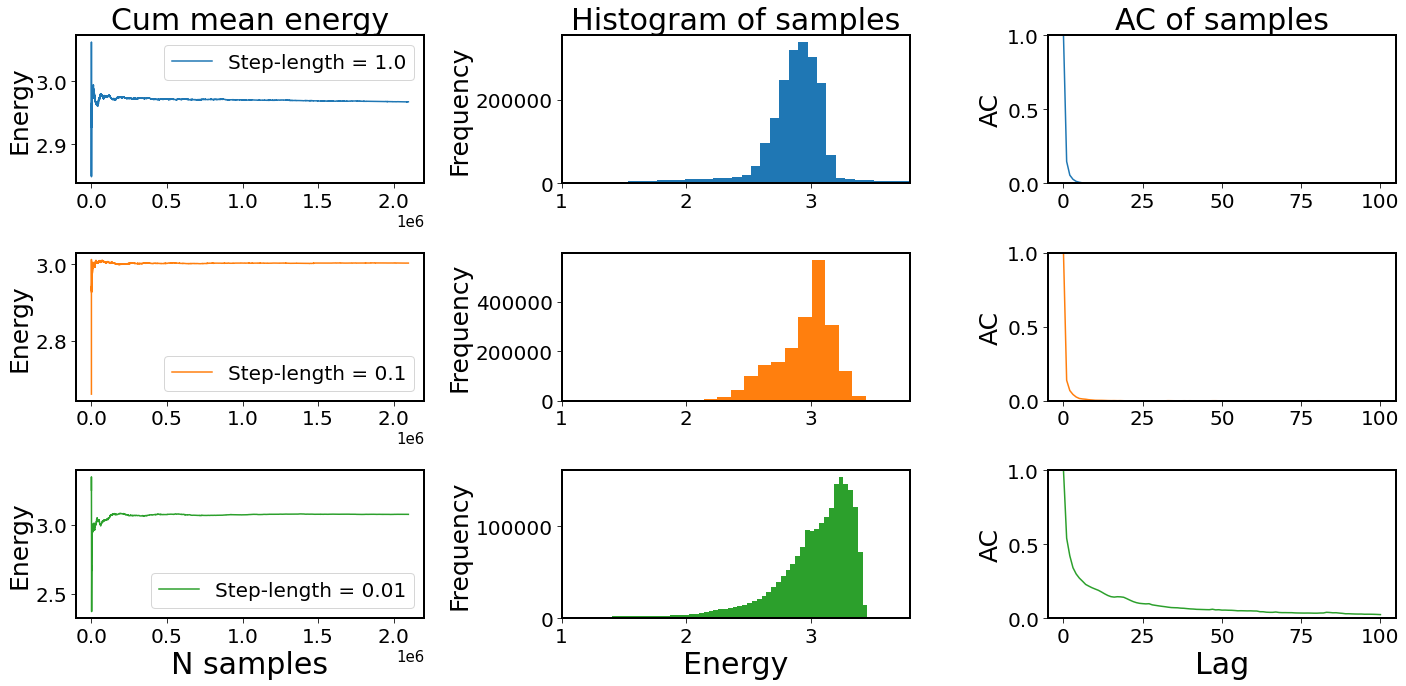

In [31]:
# plot_mcmc_diagnostic(is22_5, is22_0_5, is22_0_05, "test")
import pandas as pd
import tensorflow_probability as tfp
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

samplesList = [is22_1, is22_0_1, is22_0_01]#, is22_0_001]
steplengths = ['1.0', '0.1', '0.01']
numplots_x = 3
numplots_y = len(samplesList)

fig, ax = plt.subplots(numplots_x,numplots_y, figsize = (20,10))
fig.tight_layout(w_pad=7, h_pad=3)

styles_plot = ["#1f77b4", "#ff7f0e", "#2ca02c"]

for i, samples in zip(range(numplots_y),samplesList):
    ax[i,0].plot([j/n for j,n in zip(np.cumsum(samples), range(1,len(samples)))], styles_plot[i])
    # ax[i,0].set_ylim(2.8, 3.1)
    ax[i,0].xaxis.get_offset_text().set_fontsize(15)
    ax[i,0].set_ylabel("Energy", fontsize=25)
    ax[i,0].legend(["Step-length = " + steplengths[i]], fontsize=20)

    ax[i,0].tick_params(axis='both', which='major', labelsize=20, length=5)


    ax[i,1].hist(samples, bins=10000, color=styles_plot[i])
    ax[i,1].set_xlim(1,3.8)
    # ax[i,1].set_ylim(0,16000)
    ax[i,1].set_ylabel("Frequency", fontsize=25)


    ax[i,1].tick_params(axis='both', which='major', labelsize=20, length=5)


    # pd.plotting.lag_plot(pd.DataFrame(samples), lag=1, ax = ax[i,2], c= styles_plot[i], s=0.1)
    # ax[i,2].set_ylabel("S(t+1)", fontsize=25)
    # ax[i,2].set_xlim(-3, 3)
    # ax[i,2].set_ylim(-3, 3)
    ax[i,2].plot(tfp.stats.auto_correlation(samples, max_lags=100), styles_plot[i])
    ax[i,2].set_ylim(0,1.0)
    ax[i,2].set_ylabel("AC", fontsize=25)

    ax[i,2].tick_params(axis='both', which='major', labelsize=20, length=5)


ax[2,0].set_xlabel("N samples", fontsize=30)
ax[0,0].set_title("Cum mean energy", fontsize=30)

ax[2,1].set_xlabel("Energy", fontsize=30)
ax[0,1].set_title("Histogram of samples", fontsize=30)


ax[0,2].set_title("AC of samples", fontsize=30)
ax[2,2].set_xlabel("Lag", fontsize=30)
plt.savefig("../Plots/QDInteractingSlaterIS22SamplingComparison.png", bbox_inces='tight')

In [33]:
import tensorflow_probability as tfp

is62 = [is22_10, is22_1, is22_0_1, is22_0_01]#, is22_0_001]

energies = [block(sample)[0] for sample in is62]
variances = [block(sample)[1] for sample in is62]
acceptances = [acceptance_ratio(sample) for sample in is62]
effective_samples = [tfp.mcmc.effective_sample_size(sample).numpy() for sample in is62]


df = pd.DataFrame({"MC step-length": [10.0, 1.0, 0.1, 0.01],"Energy" : energies, "Variance" : variances, "Acceptance ratio" : acceptances , "Effective samples": effective_samples})
print(df.to_latex(index=False))

0.9999995231628418
0.9999995231628418
0.9999995231628418
0.9999995231628418
\begin{tabular}{rrrrr}
\toprule
 MC step-length &    Energy &  Variance &  Acceptance ratio &  Effective samples \\
\midrule
          10.00 &  3.167041 &  0.001566 &               1.0 &       2.341182e+03 \\
           1.00 &  2.967450 &  0.000001 &               1.0 &       1.372270e+06 \\
           0.10 &  3.003328 &  0.000002 &               1.0 &       1.217483e+06 \\
           0.01 &  3.076545 &  0.000017 &               1.0 &       7.166521e+04 \\
\bottomrule
\end{tabular}



In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
from pylab import cm
import pandas as pd

import matplotlib.font_manager as fm
font_names = [f.name for f in fm.fontManager.ttflist]

mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 2

colors = cm.get_cmap('tab10', 3)
print(colors(1))

from numpy import log2, zeros, mean, var, sum, loadtxt, arange, array, cumsum, dot, transpose, diagonal, sqrt
from numpy.linalg import inv

def block(x): 
    # preliminaries
    n = len(x)
    d = int(log2(n))
    s, gamma = zeros(d), zeros(d)
    mu = mean(x)

    # estimate the auto-covariance and variances 
    # for each blocking transformation
    for i in arange(0,d):
        n = len(x)
        # estimate autocovariance of x
        gamma[i] = (n)**(-1)*sum( (x[0:(n-1)]-mu)*(x[1:n]-mu) )
        # estimate variance of x
        s[i] = var(x)
        # perform blocking transformation
        x = 0.5*(x[0:-1:2] + x[1::2])
   
    # generate the test observator M_k from the theorem
    M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]

    # we need a list of magic numbers
    q =array([6.634897,9.210340, 11.344867, 13.276704, 15.086272, 16.811894, 18.475307, 20.090235, 21.665994, 23.209251, 24.724970, 26.216967, 27.688250, 29.141238, 30.577914, 31.999927, 33.408664, 34.805306, 36.190869, 37.566235, 38.932173, 40.289360, 41.638398, 42.979820, 44.314105, 45.641683, 46.962942, 48.278236, 49.587884, 50.892181])

    # use magic to determine when we should have stopped blocking
    for k in arange(0,d):
        if(M[k] < q[k]):
            break
    if (k >= d-1):
        print("Warning: Use more data")
    return mu, s[k]/2**(d-k)


def acceptance_ratio(e):
    length = len(e)
    accepted =  0
    for i in range(1,length): 
        if e[i] != e[i-1]:
            accepted += 1
    print(accepted/length)
    return accepted/length

(0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)


In [4]:
is22_1 = np.loadtxt("../Data/quantumDot/MC/Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_1.0_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
is22_0_1 = np.loadtxt("../Data/quantumDot/MC/Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.1_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
is22_0_01 = np.loadtxt("../Data/quantumDot/MC/Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.01_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
is22_0_001 = np.loadtxt("../Data/quantumDot/MC/Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.001_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")

is22 = [is22_1, is22_0_1, is22_0_01, is22_0_001]

In [6]:
energies = [block(sample)[0] for sample in is22]
variances = [block(sample)[1] for sample in is22]
acceptances = [acceptance_ratio(sample) for sample in is22]
mc_step_lengths = [1.0, 0.1, 0.01, 0.001]

df = pd.DataFrame({"MC step-length": mc_step_lengths,"Energy" : energies, "Var" : variances, "Acceptance ratio" : acceptances })
print(df.to_latex(index=False))

0.9999961853027344
0.9999961853027344
0.9999961853027344
0.9999961853027344
\begin{tabular}{rrrr}
\toprule
 MC step-length &    Energy &       Var &  Acceptance ratio \\
\midrule
          1.000 &  2.948432 &  0.000008 &          0.999996 \\
          0.100 &  2.996853 &  0.000009 &          0.999996 \\
          0.010 &  3.022168 &  0.000095 &          0.999996 \\
          0.001 &  3.254571 &  0.003392 &          0.999996 \\
\bottomrule
\end{tabular}



In [5]:
is22_1 = np.loadtxt("../Data/quantumDot/MC/Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_1.0_numMCSteps_1048576_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
is22_0_1 = np.loadtxt("../Data/quantumDot/MC/Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.1_numMCSteps_1048576_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
is22_0_01 = np.loadtxt("../Data/quantumDot/MC/Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.01_numMCSteps_1048576_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
is22_0_001 = np.loadtxt("../Data/quantumDot/MC/Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.001_numMCSteps_1048576_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")

is22 = [is22_1, is22_0_1, is22_0_01, is22_0_001]

In [6]:
energies = [block(sample)[0] for sample in is22]
variances = [block(sample)[1] for sample in is22]
acceptances = [acceptance_ratio(sample) for sample in is22]
mc_step_lengths = [1.0, 0.1, 0.01, 0.001]

df = pd.DataFrame({"MC step-length": mc_step_lengths,"Energy" : energies, "Var" : variances, "Acceptance ratio" : acceptances })
print(df.to_latex(index=False))

0.9999990463256836
0.9999990463256836
0.9999990463256836
0.9999990463256836
\begin{tabular}{rrrr}
\toprule
 MC step-length &    Energy &       Var &  Acceptance ratio \\
\midrule
          1.000 &  2.940594 &  0.000004 &          0.999999 \\
          0.100 &  2.994736 &  0.000002 &          0.999999 \\
          0.010 &  3.024107 &  0.000018 &          0.999999 \\
          0.001 &  3.102642 &  0.000787 &          0.999999 \\
\bottomrule
\end{tabular}



In [4]:
lr0_01 = np.loadtxt("../Data/quantumDot/VMC/Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.05_numMCSteps_1000_optimizer_adam_learningRate_0.1_numOptimSteps_1000_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_6_numhidden2_4_activationFunction_tanH_.txt")
lr0_1 = np.loadtxt("../Data/quantumDot/VMC/Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.05_numMCSteps_1000_optimizer_adam_learningRate_0.01_numOptimSteps_1000_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_6_numhidden2_4_activationFunction_tanH_.txt")

lr62 = [lr0_01, lr0_1]

energies = [block(sample)[0] for sample in is22]
variances = [block(sample)[1] for sample in is22]
acceptances = [acceptance_ratio(sample) for sample in is22]
mc_step_lengths = [1.0, 0.1, 0.01, 0.001]

df = pd.DataFrame({"MC step-length": mc_step_lengths,"Energy" : energies, "Var" : variances, "Acceptance ratio" : acceptances })
print(df.to_latex(index=False))

In [27]:
energies = []
variances = []
afs = ["tanH", "sigmoid"]
layers = ["5", "10", "15", "20", "25"]
for af in afs: 
    e = [] 
    v = []  
    for layer in layers:
        f = np.loadtxt("../Data/quantumDot/MC/Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.1_numMCSteps_1048576_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_"+ layer + "_numhidden2_"+ layer + "_activationFunction_"+af+"_.txt")
        e.append(block(f)[0])
        v.append(block(f)[1])
    energies.append(e)
    variances.append(v)

In [28]:
variances

[[2.7046272051513112e-06,
  1.5751475674581671e-06,
  1.905955302742729e-06,
  1.485025454084386e-06,
  1.482637648683868e-06],
 [2.971103185396461e-06,
  2.6512211363627856e-06,
  3.7621396258480087e-06,
  2.8218005451189044e-06,
  1.894371492364813e-06]]

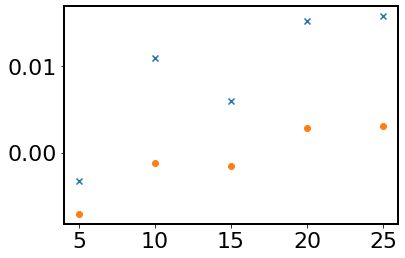

In [36]:
plt.scatter(layers, [(3.0 - e)for e in energies[0]],marker="x")
plt.scatter(layers, [(3.0 - e)for e in energies[1]])
plt.ylabel


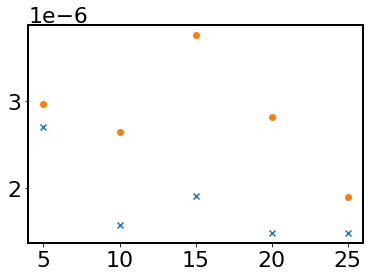

In [30]:
plt.scatter(layers, variances[0], marker = "x")
plt.scatter(layers, variances[1])


In [37]:
energies = []
variances = []
afs = ["tanH", "sigmoid"]
layers = ["5", "10", "15", "20", "25"]
for af in afs: 
    e = [] 
    v = []  
    for layer in layers:
        f = np.loadtxt("../Data/quantumDot/MC/Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.01_numMCSteps_1048576_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_"+ layer + "_numhidden2_"+ layer + "_activationFunction_"+af+"_.txt")
        e.append(block(f)[0])
        v.append(block(f)[1])
    energies.append(e)
    variances.append(v)

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, **kwargs)>

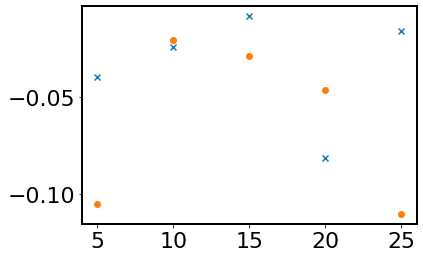

In [38]:
plt.scatter(layers, [(3.0 - e)for e in energies[0]],marker="x")
plt.scatter(layers, [(3.0 - e)for e in energies[1]])
plt.ylabel
